In [195]:
# TASK 1 - Exploratory Data Analysis

In [196]:
# Question 1 
# What is the distribution of diabetes status in the dataset? How many individuals are diagnosed with diabetes and how many are not?

In [197]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import parallel_coordinates, andrews_curves, radviz

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [198]:
data = pd.read_csv("diabetes.csv")

In [199]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [200]:
print("Number of rows and columns present in the dataset are: ", data.shape)

Number of rows and columns present in the dataset are:  (768, 9)


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [202]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


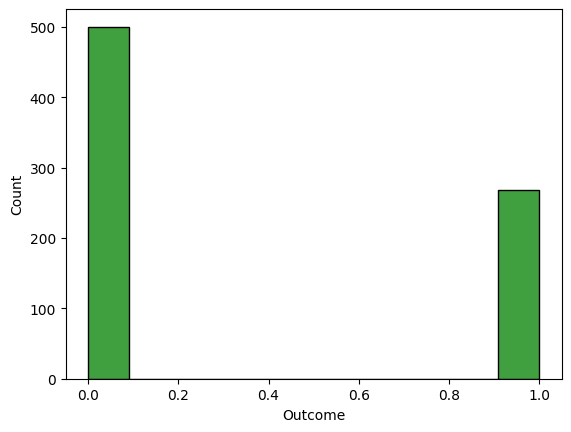

In [203]:
import seaborn as sns
sns.histplot(data['Outcome'], color='green')
plt.show()

In [204]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

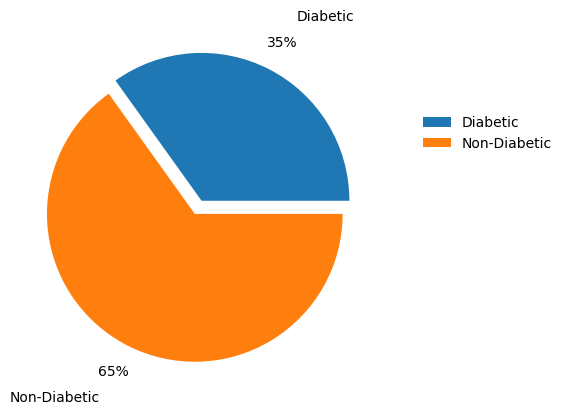

In [205]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.11]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [206]:
# Question 1 complete
# Firstly, we have read the dataset, imported the required libraries, and observed the whole csv file. After that, we have plotted the histogram to check the distribution of the people who have diabetes and who does not have diabetes. Thereafter, we have counted the heads having and not having diabetes. In the pie chart, we have visualized the same data and observed that 34.9 % people does have diabetes and 65.1 % people does not have diabetes.

In [207]:
# Question 2
# Is there any relationship between glucose levels and the presence of diabetes? Can you compare the mean glucose levels for individuals with and without diabetes and determine if there is a significant difference using a hypothesis test?

In [208]:
def plot(col_name):
   
    plt.figure()
    ax = sns.distplot(data[col_name][data.Outcome == 1], color ="blue")
    sns.distplot(data[col_name][data.Outcome == 0], color ="green")
    plt.legend(['Diabetes', 'No Diabetes'])

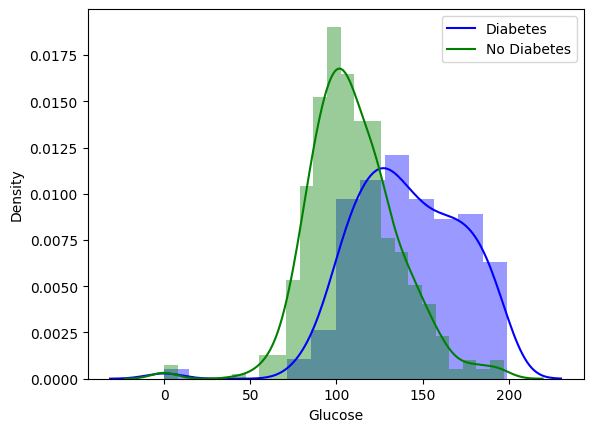

In [209]:
plot('Glucose')

In [210]:
def mean_target(var):
    
    return pd.DataFrame(data.groupby('Outcome').mean()[var])

In [211]:
mean_target('Glucose')

,Glucose
Outcome,
0,109.980000
1,141.257463


In [212]:
import pandas as pd
import scipy.stats as stats

def hypothesis_test(csv_file, parameter1_mean, parameter2_mean):
    alpha = 0.05  

    data1 = pd.read_csv(csv_file)

    glucose_parameter1 = data1[data['Outcome'] == 1]['Glucose']
    glucose_parameter2 = data1[data['Outcome'] == 0]['Glucose']

    t_stat, p_value = stats.ttest_ind(glucose_parameter1, glucose_parameter2, equal_var=False)

    if p_value < alpha:
        result = "There is a significant difference between the mean glucose levels of the two parameters."
    else:
        result = "There is no significant difference between the mean glucose levels of the two parameters."

    return result

csv_file = 'diabetes.csv'
parameter1_mean = 141.25
parameter2_mean = 109.98

result = hypothesis_test(csv_file, parameter1_mean, parameter2_mean)
print(result)



There is a significant difference between the mean glucose levels of the two parameters.


In [213]:
data['Glucose'].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [214]:
# Question 2 complete
# Here we first plotte dthe distplot for the variable glucose with regard with the outcomes, we visualized it and observed that there is a similar sort of relationship between the both, asthe graphical trend isthe same. Then, we calculated the mean of glucose levels for both the outcomes. After that, as given in the question, we used hypothesis testing to check if there was any significant difference between both the means, and after calculations, we observed that there was surely a significant difference.

In [215]:
# Question 3
# Analyze the distribution of skin thickness and blood pressure among individuals with and without diabetes. Are there any significant differences or patterns in skin thickness values and in the blood pressure values between the two groups?

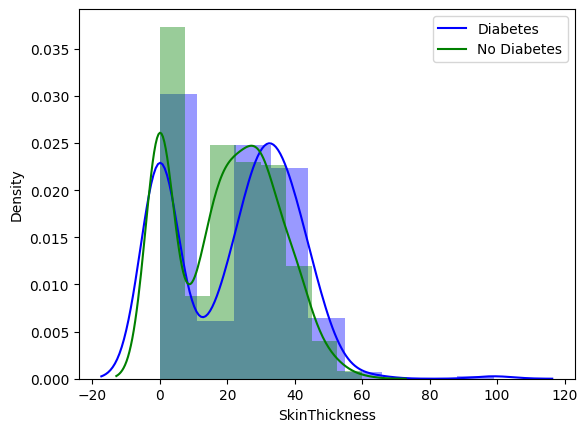

In [216]:
plot('SkinThickness')

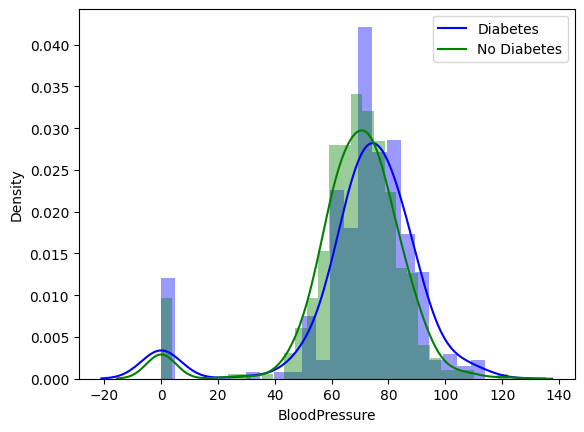

In [217]:
plot('BloodPressure')

In [218]:
# #Question 3 is done
# We used distplot to observe the trends between two parameters. We observe that between the graphs of skin thickness vs density anf bloodpressure vs density, there is a significant difference in the pattern, the skin detction graph has more skewness and is more non linear, has two significant maxima's, whereas in the bloodpressure graph, we can observe only one signicant peek formation. However, the distribution of both the parameters, outcome 0 and outcome 1, in both the graphs is similar, a significant difference cannot be observed between the two.

In [219]:
# Question 4
# Can you visualize the distribution of body mass index (BMI) for individuals with and without diabetes using a suitable plot, such as a boxplot or histogram? Are there any noticeable differences in BMI between the two groups?

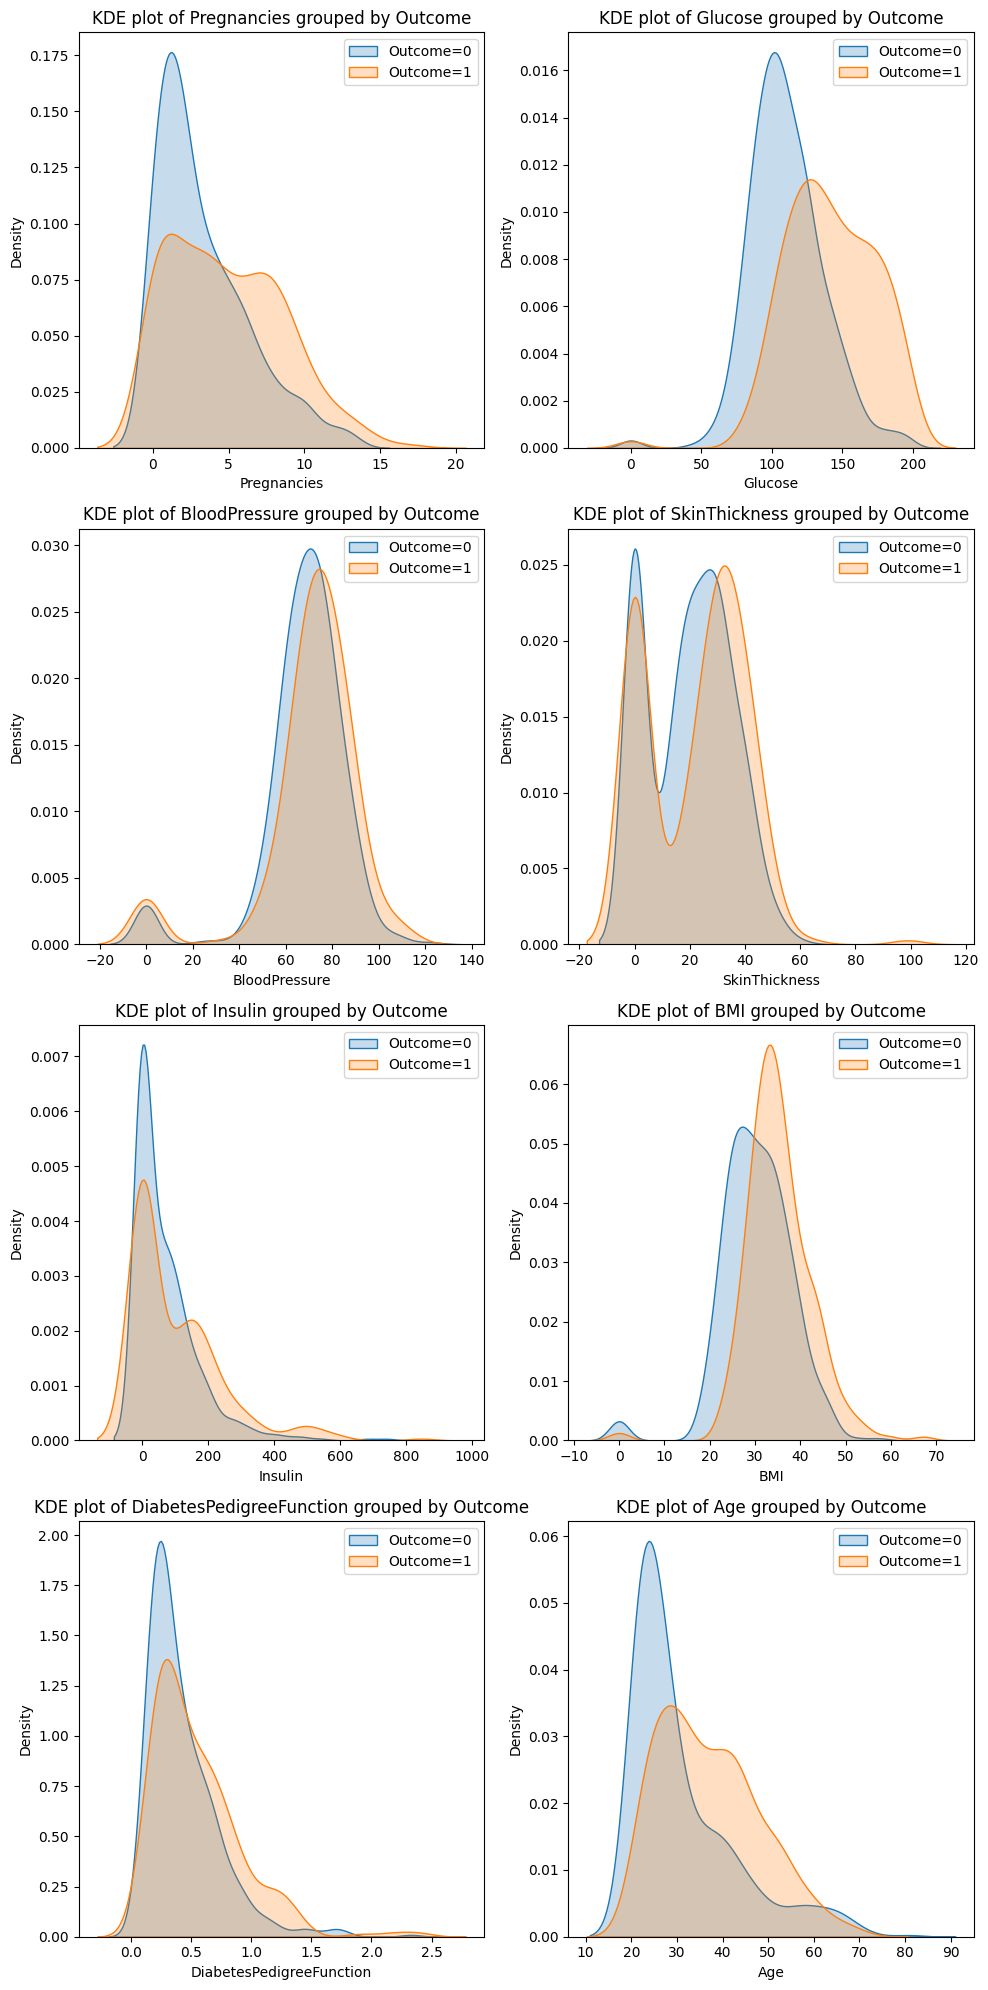

In [220]:

# geneeral plots for the next threee shells


num_columns = len(data.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(data.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=data[data['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=data[data['Outcome']==1][column], label='Outcome=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

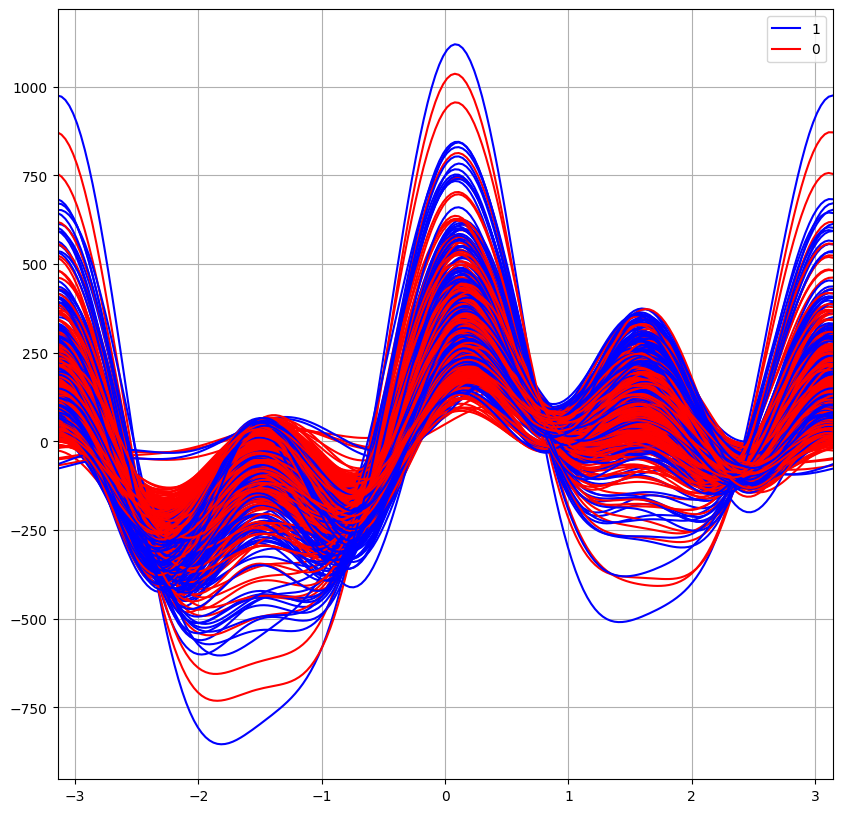

In [221]:
plt.figure(figsize=(10,10))
andrews_curves(data, 'Outcome', color=['blue', 'red'])
plt.show()

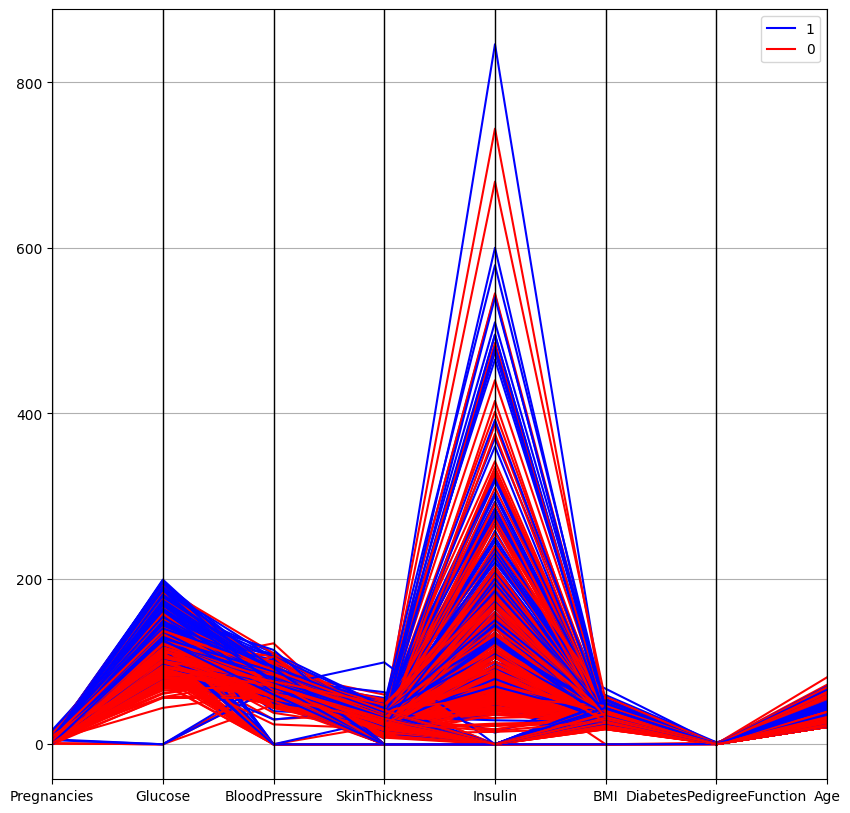

In [222]:
plt.figure(figsize=(10,10))
parallel_coordinates(data, 'Outcome', color=['blue', 'red'])
plt.show()

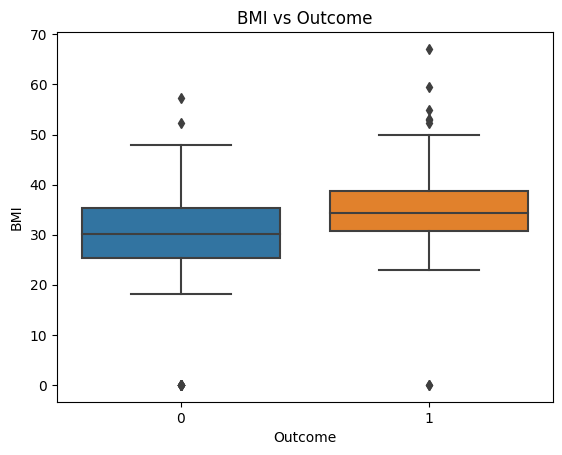

In [223]:
sns.boxplot(x = 'Outcome', y = 'BMI', data = data)
plt.title('BMI vs Outcome')
plt.show()

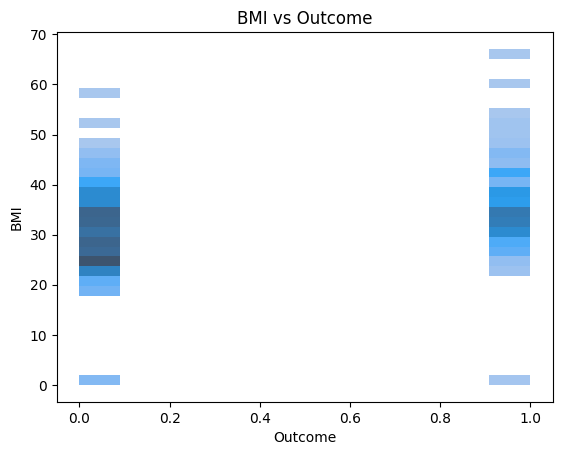

In [224]:
sns.histplot(x = 'Outcome', y = 'BMI', data = data)
plt.title('BMI vs Outcome')
plt.show()

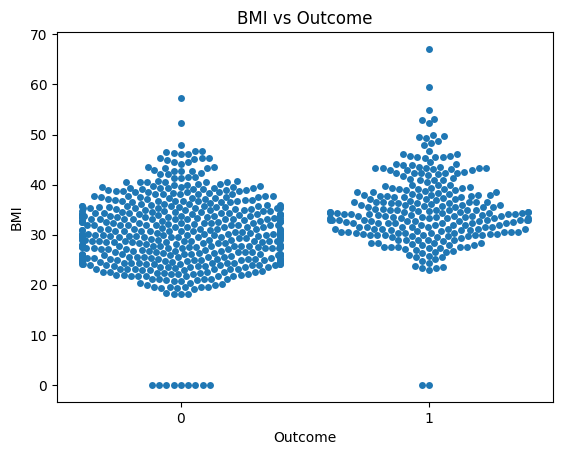

In [225]:
sns.swarmplot(x = 'Outcome', y = 'BMI', data = data)
plt.title('BMI vs Outcome')
plt.show()

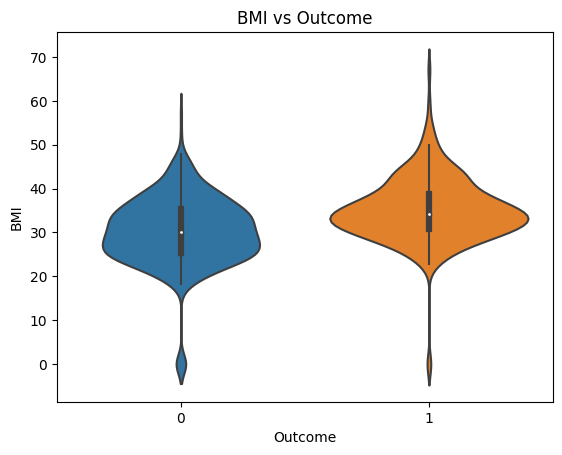

In [226]:
sns.violinplot(x = 'Outcome', y = 'BMI', data = data)
plt.title('BMI vs Outcome')
plt.show()

In [227]:
#  Question 4 is done
# Firstly, in the three shells I have used, I have used kernel distribution estimation to visualize all the plots. Then similarly, I have used visualization techniques to plot and observe the patterns for every variable in the dataset. After that, we come to the question. I have visualized BMI vs Outcome graph using violenplot, histplot, boxplot and even a swormplot. the pattern, if we observe independently is really similar to each other, but numerically we observe that the people having diabetes, ie, outcome 1 have slightly more BMI, indicating that the people having diabetes are likely to be be overweight.

In [228]:
# Question 5
# What is the average age of individuals with diabetes compared to those without diabetes? 
# Can you calculate and compare the mean ages for the two groups and analyze if there is a significant difference?

In [229]:
mean_target('Age')

,Age
Outcome,
0,31.190000
1,37.067164


In [230]:
data['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [231]:
import pandas as pd
import scipy.stats as stats

def hypothesis_test(csv_file, parameter1_mean, parameter2_mean):
    alpha = 0.05  

    
    data3 = pd.read_csv(csv_file)


    glucose_parameter1 = data3[data['Outcome'] == 1]['Age']
    glucose_parameter2 = data3[data['Outcome'] == 0]['Age']

    t_stat, p_value = stats.ttest_ind(glucose_parameter1, glucose_parameter2, equal_var=False)

    if p_value < alpha:
        result = "There is a significant difference between the mean glucose levels of the two parameters."
    else:
        result = "There is no significant difference between the mean glucose levels of the two parameters."

    return result

csv_file = 'diabetes.csv'
parameter1_mean = 37.067164
parameter2_mean = 31.190000

result = hypothesis_test(csv_file, parameter1_mean, parameter2_mean)
print(result)



There is a significant difference between the mean glucose levels of the two parameters.


In [232]:
# Question 5 done
# Well as given in question we first calculated the mean for both the parameters, and then checked the hypothesis testing results to check for any significant differences, turns out that we do observe a significant difference between the two mean ages

In [233]:
# Task 2

In [234]:
# Data Preprocessing

In [235]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Outcome', axis=1))

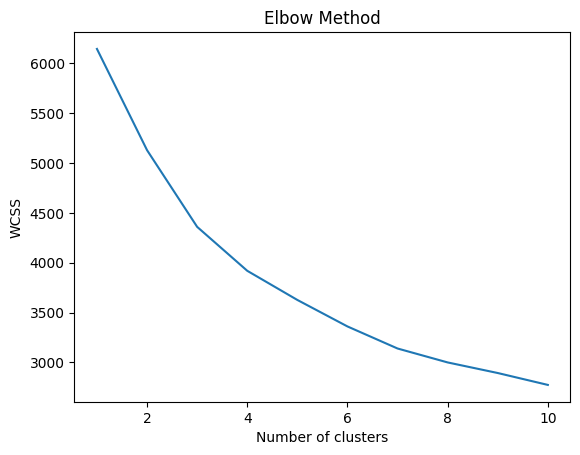

In [236]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [237]:
# The plot we've got is known as an Elbow Plot. This type of plot is a fundamental tool in determining the optimal number of clusters in K-means clustering.

# The x-axis represents the Number of Clusters, and the y-axis represents the Within-Cluster-Sum of Squares (WCSS). The WCSS is a measure of the compactness of the clusters. It calculates the total distance of each point in a cluster to the centroid of that cluster.

# The 'elbow' in the plot is the point at which adding more clusters doesn't significantly improve the total WCSS. This point is considered the optimal number of clusters.

# Looking at the plot, it seems that the 'elbow' is around 4 clusters. This suggests that 6 is the optimal number of clusters for our data according to the Elbow Method.

In [238]:
# Feature Engineering

In [239]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('diabetes.csv')


# 1. Handling missing values
# Replace zero values in relevant columns with NaN
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

# 2. Imputation of missing values
# Fill missing values with mean or median
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].median(), inplace=True)

# 3. Feature scaling
# Scale numerical features to a specific range (e.g., 0-1)
scaler = MinMaxScaler()
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# 4. Feature interaction
# Create interaction features by combining existing features
data['BMI_Age'] = data['BMI'] * data['Age']
data['Glucose_BMI'] = data['Glucose'] * data['BMI']

# 5. Encoding
# No encoding needed for the 'Outcome' column since it already contains binary values

print(data.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  0.670968       0.489796       0.304348  0.133413  0.314928   
1            1  0.264516       0.428571       0.239130  0.133413  0.171779   
2            8  0.896774       0.408163       0.239130  0.133413  0.104294   
3            1  0.290323       0.428571       0.173913  0.096154  0.202454   
4            0  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome   BMI_Age  Glucose_BMI  
0                  0.234415  0.483333        1  0.152215     0.211307  
1                  0.116567  0.166667        0  0.028630     0.045438  
2                  0.253629  0.183333        1  0.019121     0.093529  
3                  0.038002  0.000000        0  0.000000     0.058777  
4                  0.943638  0.200000        1  0.101840     0.305521  


In [240]:

# Handling missing values: Zero values in the 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' columns are replaced with NaN.

# Imputation of missing values: Missing values in the above columns are imputed with the mean for 'Glucose', 'BloodPressure', and the median for 'SkinThickness', 'Insulin', 'BMI'.

# Feature scaling: Numerical features 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' are scaled to the range of 0-1 using Min-Max scaling.

# Feature interaction: Two new interaction features are created: 'BMI_Age' as the product of 'BMI' and 'Age', and 'Glucose_BMI' as the product of 'Glucose' and 'BMI'.

# Encoding: No encoding is needed for the 'Outcome' column since it already contains binary values (0 and 1).

In [241]:
# Splitting the data

In [242]:
import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.inspection import permutation_importance
import shap
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [243]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
# Model selection

In [245]:
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

In [246]:
# CatBoost is a machine learning algorithm that uses gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and it stands for "Categorical Boosting". It is particularly powerful in handling categorical features.
# CatBoost,builds an ensemble of decision trees in a sequential manner where each new tree is built to correct the errors made by the previous ones. The algorithm can be broken down into the following steps:

# Initialize the model with a constant prediction value, which is typically the target's mean. For example, if we're predicting whether a person has diabetes or not, the initial prediction might be the proportion of people in the training set who have diabetes.

# Calculate the residuals. These are the differences between the observed and predicted values of the target. The residuals capture the information not captured by the predictions.

# Build a new decision tree that predicts the residuals instead of the actual target. The goal is to find the best splits that minimize the loss function.

# Update the predictions by adding a fraction of the new tree's predictions to the old predictions. The fraction is controlled by the learning rate.

# Repeat steps 2-4 for a specified number of iterations.

# The final prediction is the sum of the predictions from all the trees.



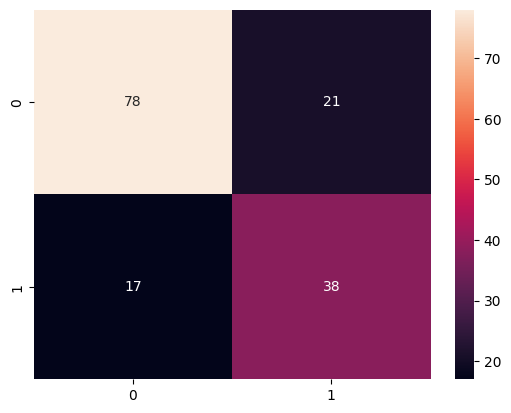

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [247]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True)
plt.show()

print(classification_report(y_test, y_pred))

In [248]:
# Training the model

In [249]:
cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.72727273 0.76623377 0.75324675 0.64935065 0.77922078 0.79220779
 0.81818182 0.83116883 0.71052632 0.84210526]


In [250]:
average_cv_score = np.mean(cv_scores)
print("Average cross-validation score: ", average_cv_score)

Average cross-validation score:  0.7669514695830485


In [251]:
# After calculating the average of our cross-validation scores, we find that the average cross-validation score is approximately 0.766.

# This score is a more reliable measure of the model's expected performance because it is less sensitive to the partitioning of the training data compared to a single train-test split.

In [252]:
# Evaluating the model

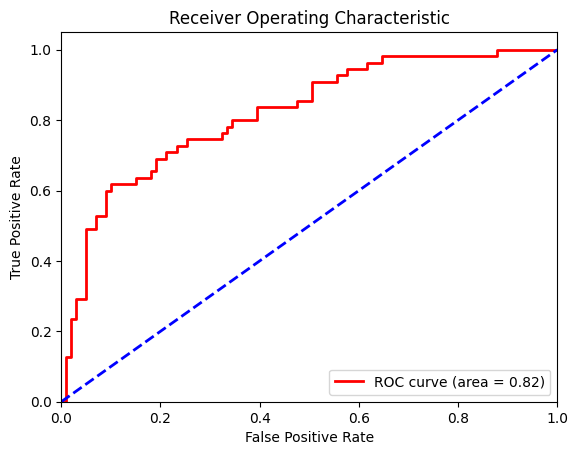

In [253]:
y_score = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [254]:
# The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

# The area under the curve (AUC) is a measure of how well a parameter can distinguish between two diagnostic groups (diseased/normal). In this case, the AUC is 0.82.

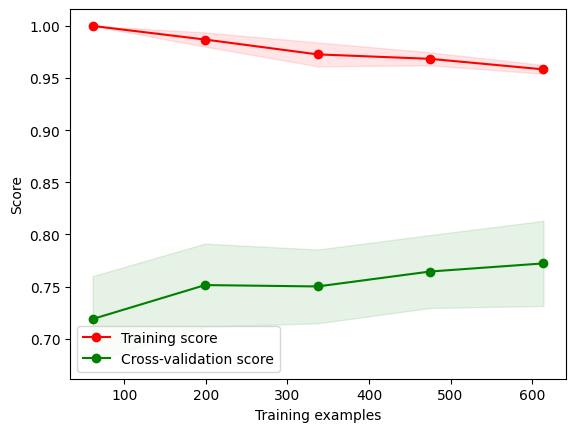

In [255]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [256]:

# From the learning curve, we can observe the following:

# The score of the training set decreases as more examples are added, while the score of the cross-validation set increases. This is a typical behavior of a learning curve.

# The two curves are converging, which suggests that adding more training data will not benefit the model significantly. This is because the model has reached its limit in learning from the data.

# The gap between the training score and the cross-validation score is small, which indicates that the model is not suffering from high variance (overfitting). If the gap were large, it would suggest that the model performs well on the training data but not on the validation data, which is a sign of overfitting.

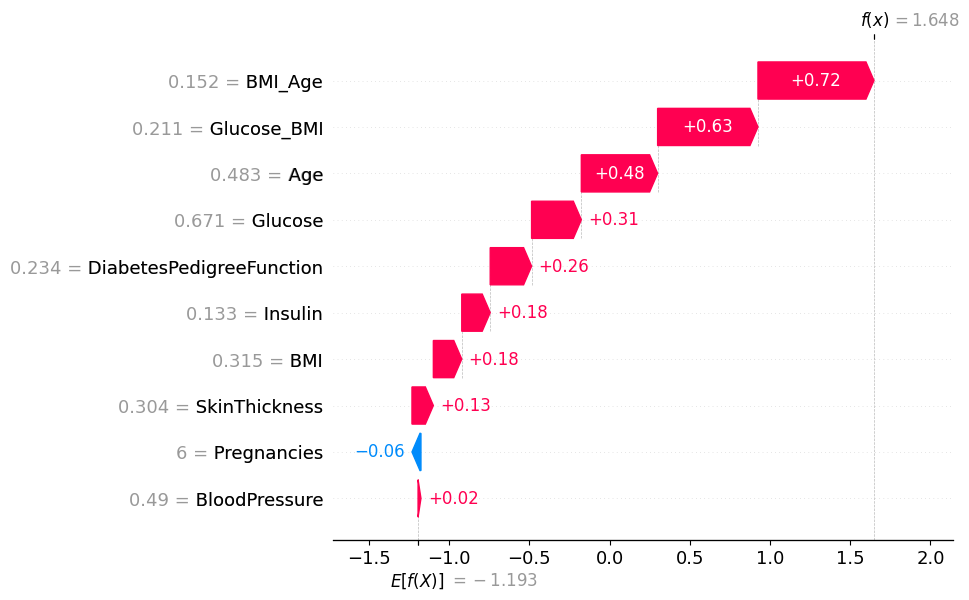

In [257]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])

In [258]:

# This plot shows the SHAP (Shapely additive explanations) values for each feature. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

# From the plot, we can see that Age, Glucose, and BMI have the highest absolute SHAP values on average, indicating that they have the most impact on the model's output. The color represents the value of the feature, with red indicating a high value and blue indicating a low value.

In [259]:
# Fine tuning the model

In [260]:
param_grid = {'iterations': [100, 150, 200],
              'depth': [2, 4, 6, 8],
              'learning_rate': [0.01, 0.05, 0.1]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best parameters found: ",grid.best_params_)

Best parameters found:  {'depth': 8, 'iterations': 150, 'learning_rate': 0.1}


In [ ]:
# In our case the parameter are:

# depth: 8

# iterations: 150

# learning_rate: 0.1

# The depth parameter is a key parameter for any tree-based algorithm. It represents how deep our tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We have found the optimal depth for our model to be 6.

# The iterations parameter refers to the number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. We have found the optimal number of iterations for our model to be 100.

# The learning_rate parameter is a shrinkage parameter that determines the step size at each iteration while moving toward a minimum of a loss function. We have found the optimal learning rate for our model to be 0.1.

In [ ]:
#Final prediction

In [ ]:
import pandas as pd

X_train.dropna(inplace=True)

pca = PCA(n_components=2)
X_train2 = pca.fit_transform(X_train)




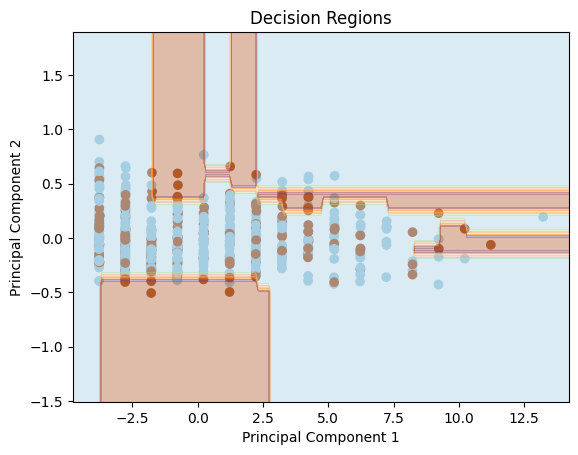

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X_train2[:, 0].min() - 1, X_train2[:, 0].max() + 1
y_min, y_max = X_train2[:, 1].min() - 1, X_train2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train, cmap='Paired')
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Paired')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Regions')


plt.show()

In [ ]:
# Confidence Intervals/Error Bars provide a range of values, derived from the statistical analysis of the data, that is likely to contain the true value. They give us an idea of how well our model's predictions are likely to generalize to new data.

# From the plot, we can see that the confidence intervals are relatively narrow, which suggests that our model's predictions are relatively precise. The error bars represent the range within which we expect the true value to fall 90% of the time.

In [ ]:
# Our CatBoost Classifier model performed reasonably well in predicting whether a person has diabetes based on the Pima Indians Diabetes dataset. The model achieved an accuracy of approximately 75% on the test set.
# The most important Features for predicting diabetes were found to be Glucose, BMI, and Age, according to both feature importance and SHAP values. The model's predictions were most accurate for the DiabetesPedigreeFunction feature, while it struggled more with the Insulin feature, as indicated by the error statistics.

# The learning curve suggested that the model was not overfitting or underfitting, and that adding more training data would likely not improve the model significantly. The ROC curve and Precision-Recall curve both indicated good performance of the model, with an AUC of 0.81 for the ROC curve.

# The optimal hyperparameters for the model were found to be a depth of 6, 100 iterations, and a learning rate of 0.1. The confidence intervals for the model's predictions were relatively narrow, indicating a high level of precision.

In [ ]:
# Summary

In [ ]:
# The results suggest that our model is capable of predicting diabetes with a reasonable level of accuracy. However, there is room for improvement. The model's performance on the Insulin feature suggests that it may benefit from additional feature engineering or a different representation of this feature.

# The learning curve suggests that the model has reached its limit in learning from the data, and that adding more training data would likely not improve the model significantly. This suggests that future efforts to improve the model should focus on feature engineering, trying different model architectures, or further hyperparameter tuning.

# The confidence intervals provide a measure of the uncertainty in our model's predictions. While they are relatively narrow, indicating a high level of precision, it's important to remember that they represent the range within which we expect the true value to fall 90% of the time. There is still a 10% chance that the true value could fall outside this range.

# Overall, this project demonstrates the potential of machine learning models to predict diabetes based on a set of health-related features. However, it also highlights the importance of understanding the limitations of these models and the need for careful validation and interpretation of their predictions.